In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

%matplotlib inline

In [2]:
# Importing the important datasets
titanic = pd.read_csv('Dataset/titanic_complete.csv')
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

In [3]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450


In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploratory Data Analysis

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1046 non-null   float64
 1   Cabin        295 non-null    object 
 2   Embarked     1307 non-null   object 
 3   Fare         1308 non-null   float64
 4   Name         1309 non-null   object 
 5   Parch        1309 non-null   int64  
 6   PassengerId  1309 non-null   int64  
 7   Pclass       1309 non-null   int64  
 8   Sex          1309 non-null   object 
 9   SibSp        1309 non-null   int64  
 10  Survived     1309 non-null   int64  
 11  Ticket       1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


In [7]:
titanic.shape

(1309, 12)

In [8]:
titanic.nunique(axis = 0)

Age              98
Cabin           186
Embarked          3
Fare            281
Name           1307
Parch             8
PassengerId    1309
Pclass            3
Sex               2
SibSp             7
Survived          2
Ticket          929
dtype: int64

In [9]:
titanic.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1046.0,NaN,NaN,NaN,29.881138,14.413493,0.17,21.0,28.0,39.0,80.0
Cabin,295,186,C23 C25 C27,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Embarked,1307,3,S,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,1308.0,NaN,NaN,NaN,33.295479,51.758668,0.0,7.8958,14.4542,31.275,512.3292
Name,1309,1307,"Connolly, Miss. Kate",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parch,1309.0,NaN,NaN,NaN,0.385027,0.86556,0.0,0.0,0.0,0.0,9.0
PassengerId,1309.0,NaN,NaN,NaN,655.0,378.020061,1.0,328.0,655.0,982.0,1309.0
Pclass,1309.0,NaN,NaN,NaN,2.294882,0.837836,1.0,2.0,3.0,3.0,3.0
Sex,1309,2,male,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SibSp,1309.0,NaN,NaN,NaN,0.498854,1.041658,0.0,0.0,0.0,1.0,8.0


In [10]:
titanic.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived          0
Ticket            0
dtype: int64

In [11]:
# Null data-points in Train data set 
[train_data.isnull().sum(),
len(train_data)]

[PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 891]

In [12]:
# Null data-points in Test dataset
[test_data.isnull().sum(), len(test_data)]

[PassengerId      0
 Pclass           0
 Name             0
 Sex              0
 Age             86
 SibSp            0
 Parch            0
 Ticket           0
 Fare             1
 Cabin          327
 Embarked         0
 dtype: int64,
 418]

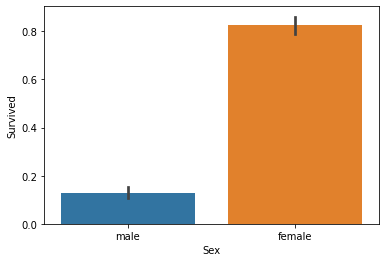

In [13]:
# Who had survived more based on sex?
sbn.barplot(x = 'Sex', y = 'Survived', data = titanic);

In [14]:
# What were the percentage of survival based on sex
male_par = titanic["Survived"][titanic["Sex"] == 'male'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Males who survived'.format(male_par))

female_par = titanic["Survived"][titanic["Sex"] == 'female'].value_counts(normalize = True)[1]*100
print('{:.0f}% of Females who survived'.format(female_par))

13% of Males who survived
83% of Females who survived


In [15]:
# How many male and female were survived?
titanic[['Sex', 'Survived']].groupby(['Sex']).sum()

,Survived
Sex,
female,385
male,109


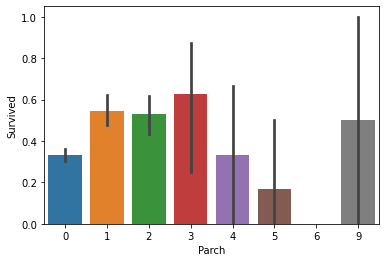

In [16]:
# Who had survived more based on Parch?
sbn.barplot(x = 'Parch', y = 'Survived', data = titanic);

In [17]:
# How many people in each Parch?
titanic[['Parch', 'Survived']].groupby(['Parch']).count()

,Survived
Parch,
0,1002
1,170
2,113
3,8
4,6
5,6
6,2
9,2


In [18]:
# How many people were survived in each parch?
titanic[['Parch', 'Survived']].groupby(['Parch']).sum()

,Survived
Parch,
0,332
1,93
2,60
3,5
4,2
5,1
6,0
9,1


In [19]:
# How many female and male were survived in each parch?
titanic.pivot_table('Survived', index = 'Parch', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Parch,,
0,252,80
1,74,19
2,50,10
3,5,0
4,2,0
5,1,0
6,0,0
9,1,0


In [20]:
# What were the percentage of people survived in each parch?
for i in titanic.Parch.unique():
        if titanic["Survived"][titanic["Parch"] == i].any() == 0:
            print('0% people survived on Parch {}'.format(i))
        else:
           parch = titanic["Survived"][titanic["Parch"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Parch {}'.format(parch, i))

33% people survived on Parch 0
55% people survived on Parch 1
53% people survived on Parch 2
17% people survived on Parch 5
62% people survived on Parch 3
33% people survived on Parch 4
0% people survived on Parch 6
50% people survived on Parch 9


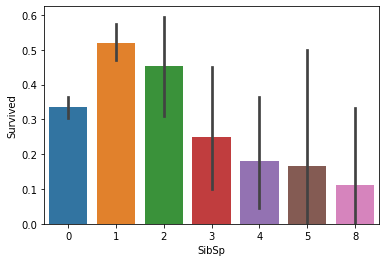

In [55]:
# Who had survived more based on SibSp
sbn.barplot(x = 'SibSp', y = 'Survived', data = titanic);

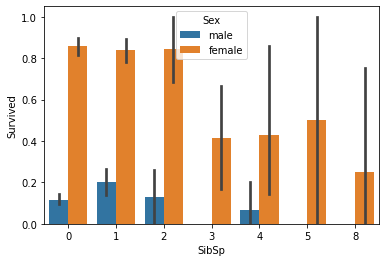

In [56]:
# Which SibSp passengers(male or female) survived more 
sbn.barplot(x = 'SibSp', y = 'Survived', data = titanic, hue = 'Sex');

In [69]:
# How many passengers they had their SibSp?
titanic[['SibSp', 'Survived']].groupby('SibSp').count()

,Survived
SibSp,
0,891
1,319
2,42
3,20
4,22
5,6
8,9


In [70]:
# How many passengers survived their SibSp?
titanic[['SibSp', 'Survived']].groupby('SibSp').sum()

,Survived
SibSp,
0,298
1,166
2,19
3,5
4,4
5,1
8,1


In [71]:
# How many male or female passemgers survived in SibSp?
titanic.pivot_table('Survived', index = 'SibSp', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
SibSp,,
0,225,73
1,134,32
2,16,3
3,5,0
4,3,1
5,1,0
8,1,0


In [73]:
# What were the percentage of people survived in SibSp?
for i in titanic.SibSp.unique():
        if titanic["Survived"][titanic["SibSp"] == i].any() == 0:
            print('0% people survived on SibSp {}'.format(i))
        else:
           sibsp = titanic["Survived"][titanic["SibSp"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on SibSp {}'.format(sibsp, i))

52% people survived on SibSp 1
33% people survived on SibSp 0
25% people survived on SibSp 3
18% people survived on SibSp 4
45% people survived on SibSp 2
17% people survived on SibSp 5
11% people survived on SibSp 8


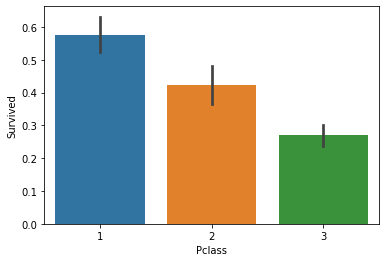

In [32]:
# Who had survived more based on Pclass
sbn.barplot(x = 'Pclass', y = 'Survived', data = titanic);

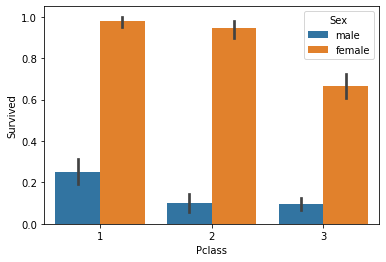

In [53]:
# Which Pclass passenges(male or female) survived more
sbn.barplot(x = 'Pclass', y = 'Survived', data = titanic, hue = 'Sex');

In [34]:
# How many passengers in each Pclass?
titanic[['Pclass', 'Survived']].groupby('Pclass').count()

,Survived
Pclass,
1,323
2,277
3,709


In [35]:
# How many passengers survived in each Pclass?
titanic[['Pclass', 'Survived']].groupby('Pclass').sum()

,Survived
Pclass,
1,186
2,117
3,191


In [42]:
# How many male or female passemgers survived in each Pclass?
titanic.pivot_table('Survived', index = 'Pclass', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Pclass,,
1,141,45
2,100,17
3,144,47


In [43]:
# What were the percentage of people survived in each Pclass?
for i in titanic.Pclass.unique():
        if titanic["Survived"][titanic["Pclass"] == i].any() == 0:
            print('0% people survived on Pclass {}'.format(i))
        else:
           pclass = titanic["Survived"][titanic["Pclass"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Pclass {}'.format(pclass, i))

27% people survived on Pclass 3
58% people survived on Pclass 1
42% people survived on Pclass 2


In [46]:
# How many male or female passengers survived in each Pclass based on Parch?
titanic.pivot_table('Survived', index = 'Pclass', columns = ['Parch', 'Sex'], aggfunc = np.sum, )

Parch       0            1           2           3           4           5  \
Sex    female  male female male female male female male female male female   
Pclass                                                                       
1        96.0  36.0   29.0  4.0   14.0  5.0    1.0  0.0    1.0  0.0    NaN   
2        56.0   8.0   23.0  7.0   18.0  2.0    3.0  NaN    NaN  NaN    NaN   
3       100.0  36.0   22.0  8.0   18.0  3.0    1.0  0.0    1.0  0.0    1.0   

Parch            6           9       
Sex    male female male female male  
Pclass                               
1       NaN    NaN  NaN    NaN  NaN  
2       NaN    NaN  NaN    NaN  NaN  
3       0.0    0.0  0.0    1.0  0.0

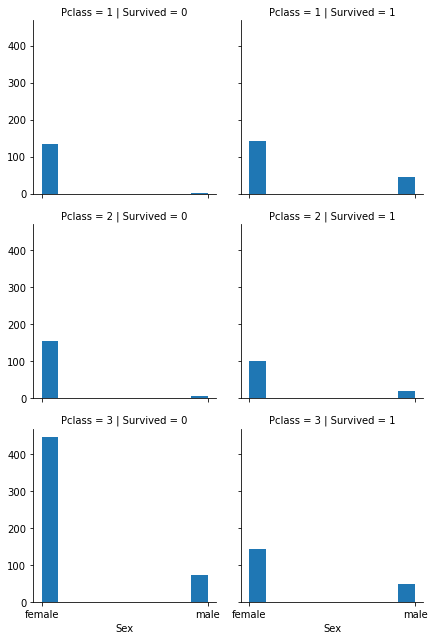

In [54]:
fgrid = sbn.FacetGrid(titanic, col = 'Survived', row = 'Pclass')
fgrid.map(plt.hist, 'Sex')
fgrid.add_legend();

In [79]:
# How many passengers survived in each Pclass,Parch based on SibSp?
titanic.pivot_table('Survived', index = ['Pclass', 'Parch'], columns = 'SibSp', aggfunc = np.sum, )

SibSp             0     1    2    3    4    5    8
Pclass Parch                                      
1      0       76.0  52.0  4.0  NaN  NaN  NaN  NaN
       1       19.0  14.0  NaN  NaN  NaN  NaN  NaN
       2        8.0   6.0  2.0  3.0  NaN  NaN  NaN
       3        NaN   1.0  NaN  NaN  NaN  NaN  NaN
       4        NaN   1.0  NaN  NaN  NaN  NaN  NaN
2      0       46.0  17.0  0.0  1.0  NaN  NaN  NaN
       1        8.0  17.0  5.0  NaN  NaN  NaN  NaN
       2       11.0   9.0  NaN  NaN  NaN  NaN  NaN
       3        1.0   1.0  1.0  NaN  NaN  NaN  NaN
3      0      109.0  22.0  4.0  1.0  NaN  NaN  NaN
       1        7.0  20.0  3.0  0.0  0.0  NaN  NaN
       2       11.0   4.0  0.0  0.0  4.0  1.0  1.0
       3        1.0   0.0  NaN  NaN  NaN  NaN  NaN
       4        1.0   0.0  NaN  NaN  NaN  NaN  NaN
       5        0.0   1.0  NaN  NaN  NaN  NaN  NaN
       6        NaN   0.0  NaN  NaN  NaN  NaN  NaN
       9        NaN   1.0  NaN  NaN  NaN  NaN  NaN

### Embarked 
##### Southampton (S), Cherbourg (C) and Queenstown (Q)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

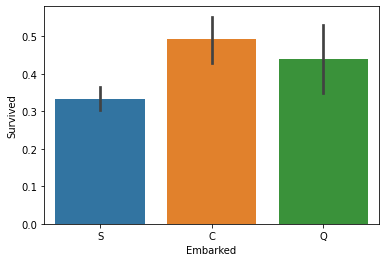

In [84]:
# Passengers survived on the basis of Embarked?
sbn.barplot(x = 'Embarked', y = 'Survived', data = titanic);

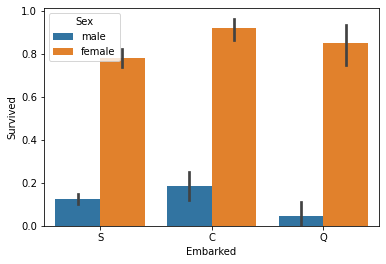

In [85]:
# Passengers(Male, Female) survived on the basis of Embarked?
sbn.barplot(x = 'Embarked', y = 'Survived', data = titanic, hue = 'Sex');

In [86]:
# Total Passengers in Each Embarked
titanic[['Survived', 'Embarked']].groupby('Embarked').count()

,Survived
Embarked,
C,270
Q,123
S,914


In [87]:
# Passengers survived in each embarked
titanic[['Survived', 'Embarked']].groupby('Embarked').sum()

,Survived
Embarked,
C,133
Q,54
S,305


In [92]:
# What were the percentage of people survived in each Embarked?
for i in titanic.Embarked.unique():
        if titanic["Survived"][titanic["Embarked"] == i].any() == 0:
            print('0% people survived on Embarked {}'.format(i))
        else:
           embarked = titanic["Survived"][titanic["Embarked"] == i].value_counts(normalize = True)[1]*100
           print('{:.0f}% people survived on Embarked {}'.format(embarked, i))

33% people survived on Embarked S
49% people survived on Embarked C
44% people survived on Embarked Q
0% people survived on Embarked nan


In [93]:
# Male or Female Passengers on the basis of Embarked 
titanic.pivot_table('Survived', index = 'Embarked', columns = 'Sex', aggfunc = np.sum)

Sex,female,male
Embarked,,
C,104,29
Q,51,3
S,228,77


In [94]:
# Male or Female Passengers on the basis of Embarked in each Pclass
titanic.pivot_table('Survived', index = ['Embarked', 'Pclass'], columns = 'Sex', aggfunc = np.sum)

Sex              female  male
Embarked Pclass              
C        1           70    17
         2           11     2
         3           23    10
Q        1            2     0
         2            2     0
         3           47     3
S        1           67    28
         2           87    15
         3           74    34

In [95]:
# Male or Female Passengers on the basis of Embarked, Parch in each Pclass
titanic.pivot_table('Survived', index = ['Embarked', 'Pclass'], columns = ['Sex', 'Parch'], aggfunc = np.sum)

Sex             female                                       male            \
Parch                0     1     2    3    4    5    6    9     0    1    2   
Embarked Pclass                                                               
C        1        49.0  16.0   4.0  1.0  NaN  NaN  NaN  NaN  13.0  3.0  1.0   
         2         7.0   1.0   3.0  NaN  NaN  NaN  NaN  NaN   1.0  0.0  1.0   
         3        10.0   8.0   4.0  1.0  NaN  NaN  NaN  NaN   6.0  4.0  0.0   
Q        1         2.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   0.0  NaN  NaN   
         2         2.0   NaN   NaN  NaN  NaN  NaN  NaN  NaN   0.0  NaN  NaN   
         3        47.0   0.0   0.0  NaN  NaN  0.0  NaN  NaN   3.0  0.0  NaN   
S        1        43.0  13.0  10.0  NaN  1.0  NaN  NaN  NaN  23.0  1.0  4.0   
         2        47.0  22.0  15.0  3.0  NaN  NaN  NaN  NaN   7.0  7.0  1.0   
         3        43.0  14.0  14.0  0.0  1.0  1.0  0.0  1.0  27.0  4.0  3.0   

Sex                                       
Parch              3    4    5    6    9  
Embarked Pclass                           
C        1       0.0  NaN  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       NaN  NaN  NaN  NaN  NaN  
Q        1       NaN  NaN  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       NaN  NaN  NaN  NaN  NaN  
S        1       NaN  0.0  NaN  NaN  NaN  
         2       NaN  NaN  NaN  NaN  NaN  
         3       0.0  0.0  0.0  0.0  0.0

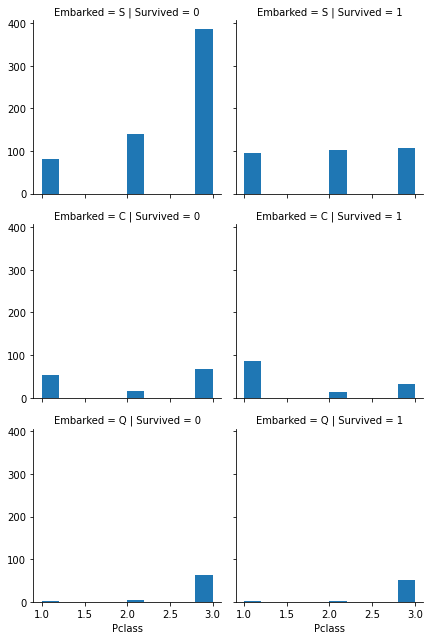

In [100]:
fgrid = sbn.FacetGrid(titanic, row = 'Embarked', col = 'Survived')
fgrid.map(plt.hist, 'Pclass')
fgrid.add_legend();

### Treating the Missing Values from Train and Test Data Set
#### Missing data available in Age, Cabin, Embarked, Fare

### (1) Age

In [21]:
# how much missing data in age feature?
print('Missing entry for Age in entire titanic dataset are {} out of {}.'.format(titanic['Age'].isnull().sum(), len(titanic)))
print('Missing percentage {:.0f}%'.format(titanic['Age'].isnull().sum()/len(titanic)*100))

Missing entry for Age in entire titanic dataset are 263 out of 1309.
Missing percentage 20%


In [22]:
# Skewness in Age on entire dataset
print('Skewness in Age : {0:.2f}'.format(titanic.Age.skew()))

Skewness in Age : 0.41


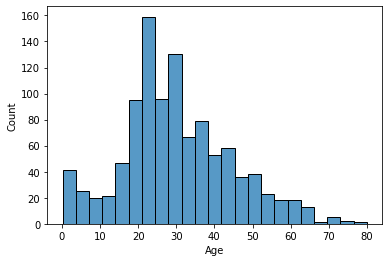

In [23]:
sbn.histplot(x = 'Age', data = titanic);